# Fruit Classification
Dataset contains selected 10 fruits labels taken from [Fruits 360](https://www.kaggle.com/moltean/fruits)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.datasets import load_files

from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


### 1. Load Dataset

In [3]:
train_dir = 'fruits-360_dataset/fruits-360/Training0'
test_dir = 'fruits-360_dataset/fruits-360/Testing0'

In [4]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [5]:
X_train, y_train, target_labels = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)
print("Data Loaded")

Data Loaded


In [6]:
print('Training set size', X_train.shape)
print('Testing set size', X_test.shape)

Training set size (5367,)
Testing set size (1795,)


In [7]:
X_test.shape

(1795,)

In [8]:
total_class = len(np.unique(y_train))
total_class

10

In [9]:
print(y_train[0:10])

[7 3 9 8 4 2 7 3 4 9]


In [10]:
y_train = np_utils.to_categorical(y_train, total_class)
y_test = np_utils.to_categorical(y_test, total_class)

print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
X_test, X_valid = X_test[750:], X_test[:750]
y_test, y_valid = y_test[750:], y_test[:750]

print(X_test.shape, X_valid.shape)
print(y_test.shape, y_valid.shape)

(1045,) (750,)
(1045, 10) (750, 10)


In [12]:
X_train[0]

'fruits-360_dataset/fruits-360/Training0\\Pepper Yellow\\98_100.jpg'

In [13]:
print(target_labels)
print(y_train[0])

['Apple Red 1' 'Avocado' 'Banana' 'Blueberry' 'Cauliflower' 'Grape White'
 'Onion Red' 'Pepper Yellow' 'Potato Sweet' 'Tomato 3']
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
def convert_image_to_array(files):
    array_img = []
    for file in files:
        array_img.append(img_to_array(load_img(file)))
    return np.array(array_img)

In [15]:
X_train = convert_image_to_array(X_train)
X_valid = convert_image_to_array(X_valid)
X_test = convert_image_to_array(X_test)

print(X_train.shape, X_valid.shape, X_test.shape)

(5367, 100, 100, 3) (750, 100, 100, 3) (1045, 100, 100, 3)


In [16]:
X_train[0]

array([[[255., 254., 251.],
        [252., 255., 255.],
        [248., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 253., 255.],
        [254., 255., 255.],
        [249., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 255., 255.],
        [255., 255., 253.],
        [255., 255., 251.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [17]:
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255
X_test = X_test.astype('float32')/255

In [18]:
X_train[0]

array([[[1.        , 0.99607843, 0.9843137 ],
        [0.9882353 , 1.        , 1.        ],
        [0.972549  , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 0.99215686, 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.9843137 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

### 2. Visualization

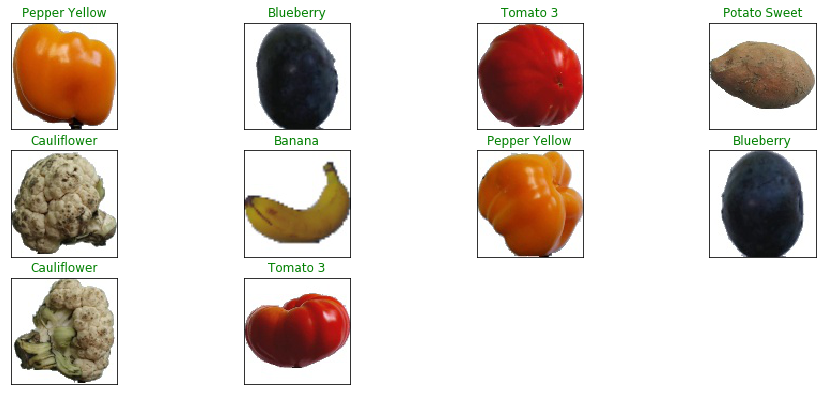

In [19]:
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])    
    ax.imshow(np.squeeze(X_train[i]))
    true_idx = np.argmax(y_train[i])
    ax.set_title("{}".format(target_labels[true_idx]), color="green")

### 3. Training Model

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

#### 3.a. Basic Architecture

In [21]:
model = Sequential()

model.add(Conv2D(input_shape=(100,100,3), filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       32896     
__________

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
checkpoint = ModelCheckpoint(filepath='cnn_basic_fruit.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint])

Train on 5367 samples, validate on 750 samples
Epoch 1/50
5344/5367 [============================>.] - ETA: 0s - loss: 8.2295 - acc: 0.0928

KeyboardInterrupt: 

In [204]:
model.load_weights('cnn_basic_fruit.hdf5')

In [205]:
acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc[1])

935/935 [==============================] - 2s 2ms/step
Test accuracy: 0.08342245994085934


### 4. Predicting

In [206]:
y_pred = model.predict(X_test)

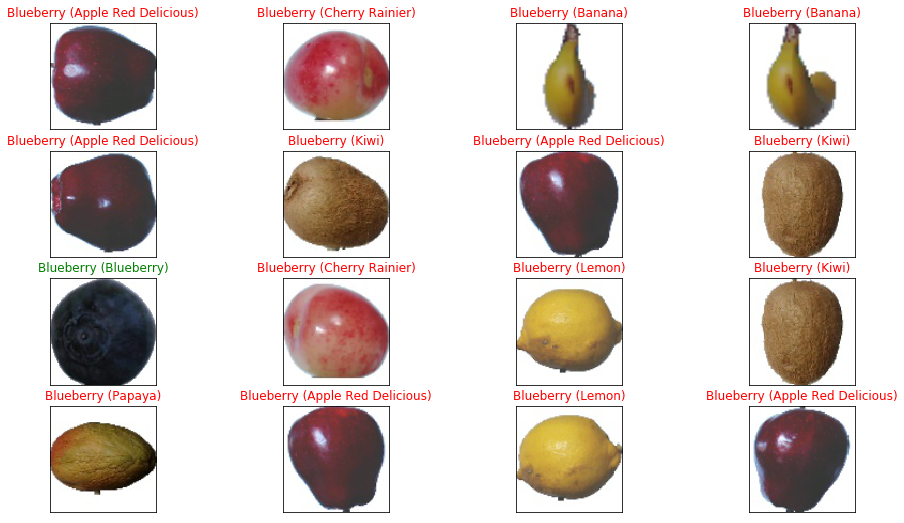

In [207]:
fig = plt.figure(figsize=(16,9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]), 
                 color=("green" if pred_idx == true_idx else "red"))

### 5. Model Evaluation

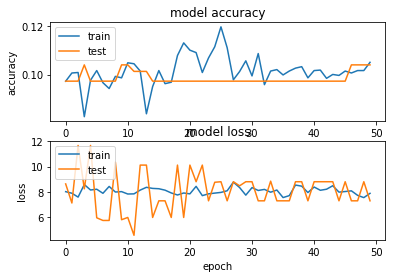

In [208]:
plt.figure(1)  
   
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()